## Machine Learning

### Hierarchical Clustering

Clustering(根據距離聚類), unsupervised algorithm builds clusters by measuring the dissimilarities between data.

With hierarchical clustering, the sum of squares starts out at zero (because every point is in its own cluster) and then grows as we merge clusters.

It is a bottom up approach, begin by treating each data point as its own cluster, then to join clusters together that have the shortest distance (euclidean distance) between them to create larger clusters.

The euclidean distance is the straight line distance between two points in euclidean space.

![Alt text](image-1.png)
from
https://www.baeldung.com/cs/clustering-unknown-number
euclidean distance

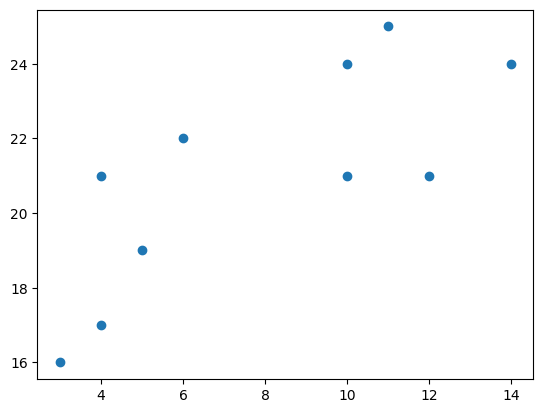

In [1]:
import numpy as np
import matplotlib.pyplot as plt

a = [4, 5, 10, 4, 3, 11, 14, 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]
plt.scatter(a,y)
plt.show()

#### dendrogram

The dendrogram illustrates how each cluster is composed bt drawing a U shaped link

[(4, 21), (5, 19), (10, 24), (4, 17), (3, 16), (11, 25), (14, 24), (6, 22), (10, 21), (12, 21)]


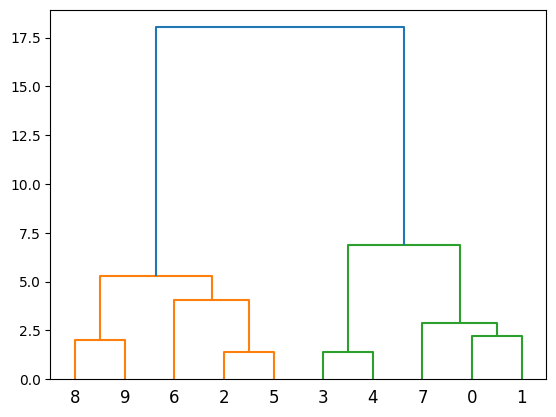

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
a = [4, 5, 10, 4, 3, 11, 14, 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]
# turn the data into a set of points
data = list(zip(a,y))
print(data)
# compute the linkage between all of the different points
# use Euclidean distance measure
# ward's linkage which seeks to minimize the variance between clusters
linkage_data = linkage(data, method = 'ward', metric = 'euclidean')
# hierarchy of clusters from the bottom individual points
# to the top (a single cluster consists of all data points)
dendrogram(linkage_data)
plt.show()
# Y-axis is the Euclidean distance,
# X-axis is set_point ie set_point[0]=(4,21)

[(4, 21), (5, 19), (10, 24), (4, 17), (3, 16), (11, 25), (14, 24), (6, 22), (10, 21), (12, 21)]
label: [0 0 1 0 0 1 1 0 1 1]


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


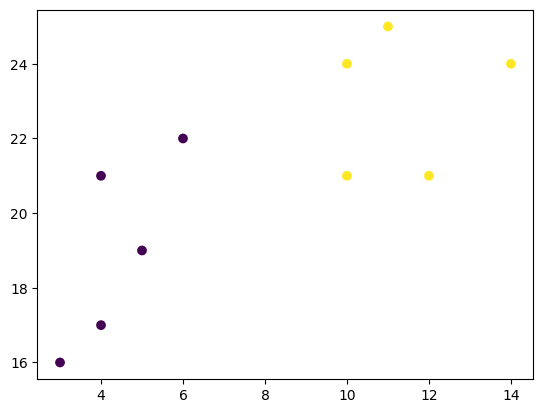

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
a = [4, 5, 10, 4, 3, 11, 14, 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]
data = list(zip(a,y))
print(data)
# initialize the AgglomerativeClustering class with 2 clusters
# using euclidean distance, and linkage = 'ward'
hierarchical_cluster = AgglomerativeClustering(
    n_clusters = 2, affinity = 'euclidean', linkage = 'ward'
)
# .fit_predict to compute the clusters using
# the defined parameters across our chosen number of clusters
labels = hierarchical_cluster.fit_predict(data)
print('label:',labels)
plt.scatter(a,y,c=labels)
plt.show()

Iris Flowers

     0    1    2    3
0  5.1  3.5  1.4  0.2
1  4.9  3.0  1.4  0.2
2  4.7  3.2  1.3  0.2
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   

   flower_type  
0            0  
1            0  
2            0  


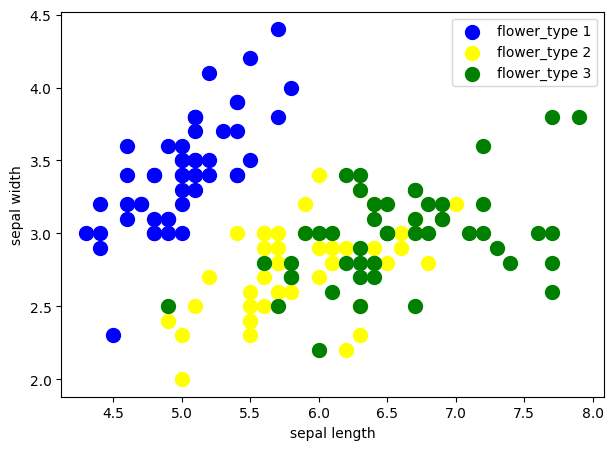

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
# The iris data has 3 types of Iris flowers,
# and it contains 4 independent variables
# will compare the original classes with the classes formed
# using the hierachical clustering method
iris = datasets.load_iris()
iris_data = pd.DataFrame(iris.data)
print(iris_data.head(3))
# feature = sepal, width ; petal length, width ; flower_type
iris_data.columns = iris.feature_names
iris_data['flower_type'] = iris.target # target variable
print(iris_data.head(3))
iris_X = iris_data.iloc[:, [0,1,2,3]].values
# iloc is a position based index to select rows and column
# select all rows and columns 0,1,2,3 but exclude flower_type
iris_Y = iris_data.iloc[:, 4].values # flower_type as y
plt.figure(figsize=(7,5))
# flower type 0
plt.scatter(iris_X[iris_Y == 0,0],iris_X[iris_Y == 0,1],
            s = 100, c = 'blue', label = 'flower_type 1')
# flower type 1
plt.scatter(iris_X[iris_Y == 1,0],iris_X[iris_Y == 1,1],
            s = 100, c = 'yellow', label = 'flower_type 2')
# flower type 2
plt.scatter(iris_X[iris_Y == 2,0],iris_X[iris_Y == 2,1],
            s = 100, c = 'green', label = 'flower_type 3')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()
plt.show()
# output shows all 3 classes of iris flowers are overlapping
# with each other

Text(0, 0.5, 'Euclidean Distance')

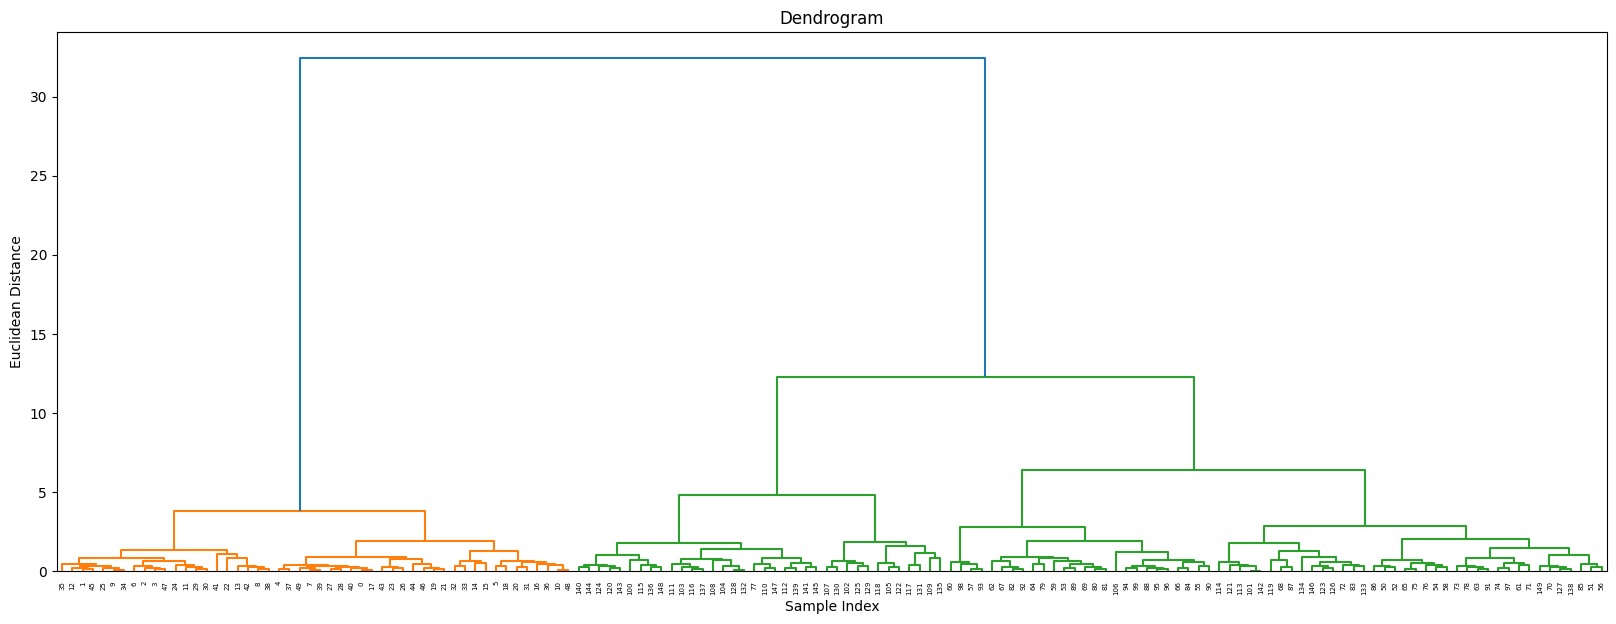

In [34]:
import scipy.cluster.hierarchy as sc
plt.figure(figsize=(20,7))
plt.title('Dendrogram')
sc.dendrogram(sc.linkage(iris_X, method='ward'))
plt.xlabel('Sample Index')
plt.ylabel('Euclidean Distance')
# plt.autoscale(enable=True, axis=None, tight=True)

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


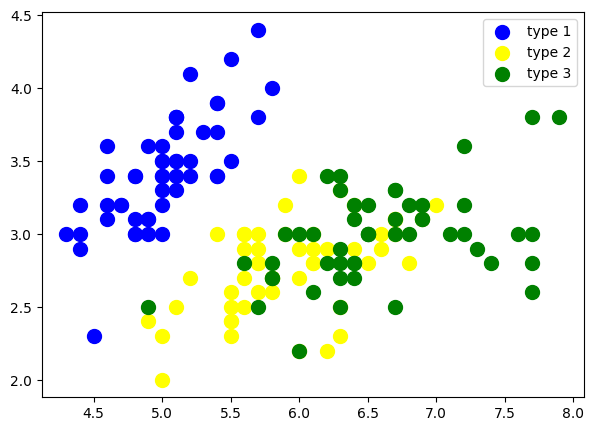

In [36]:
# fit the model
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(
    n_clusters = 3, affinity = 'euclidean', linkage = 'ward'
)
cluster.fit(iris_X)
labels = cluster.labels_
print(labels) # target
plt.figure(figsize=(7,5))
plt.scatter(iris_X[iris_Y == 0,0],iris_X[iris_Y == 0,1],
            s = 100, c = 'blue', label = 'type 1')
plt.scatter(iris_X[iris_Y == 1,0],iris_X[iris_Y == 1,1],
            s = 100, c = 'yellow', label = 'type 2')
plt.scatter(iris_X[iris_Y == 2,0],iris_X[iris_Y == 2,1],
            s = 100, c = 'green', label = 'type 3')
plt.legend() ; plt.show()
# still overlapping between type 1 and 3 but
# improved comparing to the original